In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

In [4]:
data=pd.read_csv('ex2data1.txt',names=['exam1_score','exam2_score','status'])

In [5]:
data.head(5)

,exam1_score,exam2_score,status
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:
np.shape(data)

(100, 3)

In [7]:
X=data.iloc[:,0:2]

In [8]:
y=data.iloc[:,2]

In [9]:
def plotData(X,y):
    #pos=X[np.where(y==1)]
    pos=data.loc[data['status']==1]
    neg=data.loc[data['status']==0]
   # print(pos.tail(3))
    plt.plot(pos['exam1_score'],pos['exam2_score'],'b+')
    plt.plot(neg['exam1_score'],neg['exam2_score'],'ro')
    plt.xlabel('exam1_score')
    plt.ylabel('exam2_score')
    plt.legend(['Admitted','Not Admitted'])
    

In [10]:
m=len(y)
print(np.shape(X))
x=np.ones([m,1])
np.shape(x)
X=np.hstack((x,X));
print(np.shape(y))

(100, 2)
(100,)


In [11]:
theta=np.zeros(3)
np.shape(theta)


(3,)

In [12]:
def sigmoid(X,theta):
    z=np.matmul(X,theta);
    g=1/(1+np.exp(-z));
    return g

In [13]:
def costFunction(theta,X,y):
    h=sigmoid(X,theta)
    J=0
    J=-(1/m)*((y*np.log(h))+(1-y)*np.log(1-h)).sum();
    #J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    grad =(1/m)*(X.T.dot(h-y))
    #grad =(1/m)*X.T.dot(h-y)
    #J=np.array(J)
    #J=J.reshape([1,1])
    return J,grad

In [14]:
np.shape(sigmoid(X,theta))


(100,)

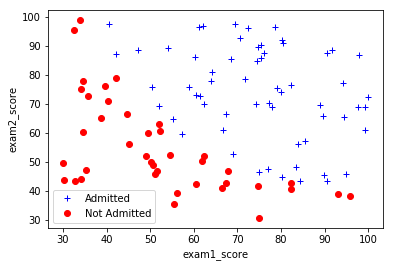

In [15]:
plotData(X,y)
plt.show()

In [16]:
(J,grad)=costFunction(theta,X,y)

In [17]:
grad

array([ -0.1       , -12.00921659, -11.26284221])

In [18]:
theta

array([ 0.,  0.,  0.])

In [19]:
np.shape(y)

(100,)

In [20]:
res = minimize(costFunction,
	       theta,
	       method='Newton-CG',
	       args=(X,y),
	       jac=True, 
	       options={'maxiter':400,
			'disp':True})

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 29
         Function evaluations: 72
         Gradient evaluations: 282
         Hessian evaluations: 0


In [21]:
#options={'maxiter':400}

In [22]:
#result=minimize(costFunction,theta,args=(X,y),method='TNC',jac=True,options=options)

In [23]:
theta=res.x

In [24]:
cost=res.fun

In [25]:
theta

array([-25.16234743,   0.20623982,   0.2014798 ])

In [26]:
cost

0.203497701742292

In [27]:
def predict(X,y,theta):
    z=sigmoid(X,theta)>=0.5
    p=np.mean(z==y)*100
    return p

In [28]:
p=predict(X,y,theta)

In [29]:
p

89.0

In [38]:
def decisionBoundary(X,theta):
    plot_x=[min(X[:,1]),max(X[:,1])]
   
    plot_y=-(1/theta[2])*(np.multiply(theta[1],plot_x)+theta[0])
    plotData(X[:,2:3],y)
    plt.plot(plot_x,plot_y)
    plt.show()

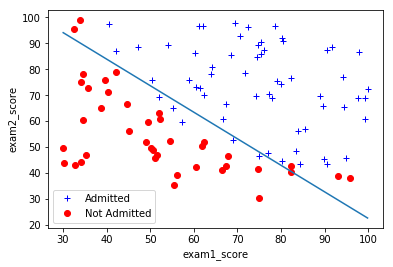

In [39]:
decisionBoundary(X,theta)

In [222]:
c=[1,79.0327360507101,75.3443764369103]
print(round(sigmoid(c,theta)))
d=[1,67.94685547711617,46.67857410673128]
print(round(sigmoid(d,theta)))

1.0
0.0
